# Project 1

Due: 11/13/25

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

## Data Description

**Describe the data clearly -- particularly any missing data that might impact your analysis -- and the provenance of your dataset. Who collected the data and why? (10/100 pts)**

In [3]:
ukraine = pd.read_csv('ukraine-damages.csv', sep='|', header=0, index_col=False)
ukraine.head()

,damage_id,iso3,country,gid_1,oblast,rayon,type_of_infrastructure,if_other_what,date_of_event,source_name,source_date,source_link,additional_sources,extent_of_damage,_internal_filter_date,_weights,access_subindicator,pcode
0,D0011,UKR,Ukraine,['UKR.15_1'],Luhanska,Siverskodonetskyi,Warehouse,NaN,2022-03-25,OCHA,2022-03-28,https://reliefweb.int/report/ukraine/ukraine-h...,NaN,Destroyed,2022-03-25,0.7,['7.2'],UA44
1,D0012,UKR,Ukraine,['UKR.15_1'],Luhanska,Siverskodonetskyi,Warehouse,NaN,2022-03-26,OCHA,2022-03-28,https://reliefweb.int/report/ukraine/ukraine-h...,NaN,Partially damaged,2022-03-26,0.7,['7.2'],UA44
2,D0015,UKR,Ukraine,['UKR.14_1'],Lvivska,NaN,Warehouse,NaN,2022-03-26,OCHA,2022-03-28,https://reliefweb.int/report/ukraine/ukraine-h...,NaN,Unknown,2022-03-26,1.0,['7.2'],UA46
3,D0016,UKR,Ukraine,['UKR.14_1'],Lvivska,NaN,Aircraft repair plant,Aircraft repair plan,2022-03-26,OCHA,2022-03-28,https://reliefweb.int/report/ukraine/ukraine-h...,NaN,Destroyed,2022-03-26,1.0,['7.2'],UA46
4,D0017,UKR,Ukraine,['UKR.12_1'],Kyivska,NaN,Bridge,NaN,2022-03-22,OCHA,2022-03-28,https://reliefweb.int/report/ukraine/ukraine-h...,NaN,Destroyed,2022-03-22,1.0,['9.2'],UA32


In [ ]:
ukraine.to_csv('ukraine-data.csv', index=False)

### Basic Overview

In [5]:
ukraine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24269 entries, 0 to 24268
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   damage_id               24269 non-null  object 
 1   iso3                    24269 non-null  object 
 2   country                 24269 non-null  object 
 3   gid_1                   24261 non-null  object 
 4   oblast                  24261 non-null  object 
 5   rayon                   15549 non-null  object 
 6   type_of_infrastructure  24265 non-null  object 
 7   if_other_what           3107 non-null   object 
 8   date_of_event           17918 non-null  object 
 9   source_name             24267 non-null  object 
 10  source_date             22935 non-null  object 
 11  source_link             24266 non-null  object 
 12  additional_sources      3121 non-null   object 
 13  extent_of_damage        24266 non-null  object 
 14  _internal_filter_date   24269 non-null

Notes about the data:
- damage_id
-iso3 gives the country's unique 3 letter code form the Internations Organization for Standarization (ISO)
    - https://acleddata.com/methodology/guide-2023-acled-column-changes
- oblast is a term that refers to the primary (highest level) administrative division (region) in Ukraine. There are 24 of them in Ukraine.
- it appears that the `_internal_filter_date` column is equal to the `event_date` column if there is event_date data, and otherwise equals the source_date. 

In [6]:
# Convert 'date_of_event' and 'source_date' to datetime
ukraine['date_of_event'] = pd.to_datetime(ukraine['date_of_event'], errors='coerce')
ukraine['source_date'] = pd.to_datetime(ukraine['source_date'], errors='coerce')

In [7]:
print(ukraine['date_of_event'].min())
print(ukraine['date_of_event'].max())

2022-02-24 00:00:00
2025-10-01 00:00:00


In [8]:
# Categorical Variables Summary
print(ukraine['iso3'].value_counts())


iso3
UKR    24269
Name: count, dtype: int64


In [9]:
print(ukraine['oblast'].value_counts())


oblast
Donetska                         6095
Dnipropetrovska                  4053
Kharkivska                       3393
Khersonska                       2305
Mykolaivska                      2110
Sumska                           1540
Zaporizka                         803
Odeska                            671
Kyivska                           645
Luhanska                          588
Chernihivska                      516
Kyiv                              498
Zhytomyrska                       204
Khmelnytska                       177
Poltavska                         148
Cherkaska                         133
Lvivska                           128
Kirovohradska                      67
Vinnytska                          53
Ternopilska                        37
Rivnenska                          22
Ivano-Frankivska                   19
Autonomous Republic of Crimea      16
Volynska                           16
Zakarpatska                        12
Chernivetska                        7
Sevas

In [10]:
print(ukraine['rayon'].value_counts())


rayon
Nikopolskyi     2474
Kramatorskyi    2274
Kharkivskyi     1308
Khersonskyi     1187
Pokrovskyi       733
                ... 
Kaluskyi           1
Yaltynskyi         1
Zhmerynskyi        1
Sambirskyi         1
Kovelskyi          1
Name: count, Length: 113, dtype: int64


In [11]:
print(ukraine['type_of_infrastructure'].value_counts())

type_of_infrastructure
Industrial/Business/Enterprise facilities     5056
Education facility (school, etc.)             5021
Electricity supply system                     3016
Government facilities                         2060
Gas supply system                             1968
Cultural facilities (museum, theater etc.)    1210
Health facility (hospital, health clinic)     1169
Warehouse                                      834
Agricultural facilities                        805
Other                                          724
Railway                                        556
Water supply system                            280
Religious facilities                           277
Road / Highway                                 245
Heating and water facility                     244
Fuel depot                                     203
Telecommunications                             171
Bridge                                         146
Power plant                                     74
Harbor  

In [12]:
print(ukraine['extent_of_damage'].value_counts())

extent_of_damage
Partially damaged               20566
Unknown                          2457
Destroyed                        1242
Partially damaged, Destroyed        1
Name: count, dtype: int64


In [13]:
# Temporal Analysis
ukraine_copy = ukraine.copy()
ukraine_copy['year'] = ukraine_copy['date_of_event'].dt.year

print("Year Distribution:")
year_counts = ukraine_copy['year'].value_counts().sort_index()
for year, count in year_counts.items():
    if pd.notna(year):
        pct = count / len(ukraine) * 100
        print(f"{int(year)}: {count:6,} records ({pct:5.2f}%)")

print("\nMonthly Distribution:")     
ukraine_copy['year_month'] = ukraine_copy['date_of_event'].dt.to_period('M')
monthly_counts = ukraine_copy['year_month'].value_counts().sort_index()
for month, count in monthly_counts.items():
    if pd.notna(month):
        pct = count / len(ukraine) * 100
        print(f"{month}: {count:6,} records ({pct:5.2f}%)")

Year Distribution:
2022:  1,620 records ( 6.68%)
2023:  3,703 records (15.26%)
2024:  5,469 records (22.53%)
2025:  7,126 records (29.36%)

Monthly Distribution:
2022-02:     36 records ( 0.15%)
2022-03:    148 records ( 0.61%)
2022-04:    187 records ( 0.77%)
2022-05:    226 records ( 0.93%)
2022-06:    227 records ( 0.94%)
2022-07:    162 records ( 0.67%)
2022-08:    134 records ( 0.55%)
2022-09:     14 records ( 0.06%)
2022-10:     60 records ( 0.25%)
2022-11:    176 records ( 0.73%)
2022-12:    250 records ( 1.03%)
2023-01:    258 records ( 1.06%)
2023-02:    194 records ( 0.80%)
2023-03:    191 records ( 0.79%)
2023-04:    222 records ( 0.91%)
2023-05:    458 records ( 1.89%)
2023-06:    375 records ( 1.55%)
2023-07:    302 records ( 1.24%)
2023-08:    388 records ( 1.60%)
2023-09:    336 records ( 1.38%)
2023-10:    356 records ( 1.47%)
2023-11:    262 records ( 1.08%)
2023-12:    361 records ( 1.49%)
2024-01:    435 records ( 1.79%)
2024-02:    406 records ( 1.67%)
2024-03:    4

In [14]:
# Summary Statistics

summary = {
    'total_records': len(ukraine),
    'total_columns': len(ukraine.columns),
    'unique_oblasts': ukraine['oblast'].nunique(),
    'unique_rayons': ukraine['rayon'].nunique(),
    'unique_infrastructure_types': ukraine['type_of_infrastructure'].nunique(),
    'date_range': f"{ukraine['date_of_event'].min()} to {ukraine['date_of_event'].max()}",
    'missing_dates_pct': (ukraine['date_of_event'].isna().sum() / len(ukraine) * 100),
    'missing_rayons_pct': (ukraine['rayon'].isna().sum() / len(ukraine) * 100)
}

for key, value in summary.items():
    print(f"{key}: {value}")


total_records: 24269
total_columns: 18
unique_oblasts: 27
unique_rayons: 113
unique_infrastructure_types: 25
date_range: 2022-02-24 00:00:00 to 2025-10-01 00:00:00
missing_dates_pct: 26.169187028719765
missing_rayons_pct: 35.93061106761712


This dataset documents the infrastructure damage across Ukraine from the ongoing war. It contains 24,269 unique records spanning from February 24, 2022 to October 01, 2025. The dataset provides granular documentation of damage to vivilian and critical infratructure across all 27 regions of Ukraine.

### Key Dataset Characteristics:

**Size:** 24,269 unique damage records across 27 Ukrainian oblasts (regions), spanning February 2022 to October 2025

**Geographic Focus:** There is the heaviest damage concentation in the eastern and soutern front-line regions (Donestska, Dnipropetrovska, Kharkivska, Khersonska)

**Infrastructure Types:** The data documents damage to 25 categories, predominently industrial facilities (21%), schools (21%), and electricity systems (12%)

### Missing Data

In [15]:
missing_data = pd.DataFrame({
    'Column': ukraine.columns,
    'Missing Count': ukraine.isnull().sum(),
    'Missing Percentage': (ukraine.isnull().sum() / len(ukraine) * 100).round(2)
})

In [16]:
display(missing_data)

,Column,Missing Count,Missing Percentage
damage_id,damage_id,0,0.00
iso3,iso3,0,0.00
country,country,0,0.00
gid_1,gid_1,8,0.03
oblast,oblast,8,0.03
rayon,rayon,8720,35.93
type_of_infrastructure,type_of_infrastructure,4,0.02
if_other_what,if_other_what,21162,87.20
date_of_event,date_of_event,6351,26.17
source_name,source_name,2,0.01


In [17]:
oblast_rayon = ukraine.groupby('oblast')['rayon'].apply(lambda x: x.isnull().sum())
total_by_oblast = ukraine.groupby('oblast').size()
missing_pct = (oblast_rayon / total_by_oblast * 100).round(2)

rayon_analysis = pd.DataFrame({
    'Oblast': oblast_rayon.index,
    "Total Records": total_by_oblast.values,
    "Missing Rayon": oblast_rayon.values,
    "Missing %": missing_pct.values
})

rayon_analysis_sorted = rayon_analysis.sort_values('Missing %', ascending=False)

display(rayon_analysis_sorted)                  

,Oblast,Total Records,Missing Rayon,Missing %
26,Zhytomyrska,204,176,86.27
15,Mykolaivska,2110,1738,82.37
18,Rivnenska,22,17,77.27
22,Vinnytska,53,37,69.81
12,Kyivska,645,445,68.99
13,Luhanska,588,405,68.88
6,Ivano-Frankivska,19,9,47.37
2,Chernihivska,516,234,45.35
5,Donetska,6095,2716,44.56
25,Zaporizka,803,317,39.48


In [18]:
# Date validity
valid_event_dates = ukraine['date_of_event'].notna().sum()
valid_event_pct = (valid_event_dates / len(ukraine) * 100)
print(f"Records with valid event dates: {valid_event_dates:,} ({valid_event_pct:.2f}%)")
print(f"Records with missing event dates: {ukraine['date_of_event'].isna().sum():,} "
      f"({(ukraine['date_of_event'].isna().sum()/len(ukraine)*100):.2f}%)")

Records with valid event dates: 17,918 (73.83%)
Records with missing event dates: 6,351 (26.17%)


### Critical Missing Data That Will Impact Analysis

1. **Date of Event (26.17% missing):** This is the most significant gap, with over 6,000 records lacking event dates. This severely limits temporal analysis and trend identification.

2. **Rayon/District (35.93% mssing):** This reduces reographic precision, with mssing rates varying dramatically by oblast (from 0% to 86% depending on region).

3. **Additional Sources (87.14% missing):** Most records cite only a single source, limiting cross-verification capabilities.

4. **"If Other What" (87.20% missing):** This is not concerning. This field only applies to the 3% of records classified as "Other" infratructure.

# Creating Markov Chain Model

In [35]:
# Build transition matrix

def build_transition_matrix(df, sequence_col, 
                      time_col = 'date_of_event', min_count = 10):
    """
    Build transition probability matrix from damage sequence.

    Returns: transition matrix, transition_counts, valid_states
    """
    df = df.copy()
    df[time_col] = pd.to_datetime(df[time_col], errors='coerce')
    df = df.sort_values(by=time_col).reset_index(drop=True)
    df = df[df[sequence_col].notna()].reset_index(drop=True)

    states = df[sequence_col].values

    state_counts = pd.Series(states).value_counts()
    valid_states = state_counts[state_counts >= min_count].index.tolist()

    transition_counts = pd.DataFrame(0, index = valid_states, columns = valid_states, dtype = float)

    for i in range(len(states) - 1):
        current = states[i]
        next_state = states[i + 1]
        if current in valid_states and next_state in valid_states:
            transition_counts.loc[current, next_state] += 1

    transition_matrix = transition_counts.div(transition_counts.sum(axis=1), axis=0).fillna(0)

    return transition_matrix, transition_counts, valid_states

In [20]:
# Analyze transition probabilities

def get_transition_probability(transition_matrix, transition_counts, from_state, to_state):
    """Get probability of transitioning from one infratructure type to another."""

    if from_state not in transition_matrix.index or to_state not in transition_matrix.columns:
        return None
    
    prob = transition_matrix.loc[from_state, to_state]
    count = int(transition_counts.loc[from_state, to_state])
    total = int(transition_counts.loc[from_state].sum())

    return {
        'from': from_state,
        'to': to_state,
        'probability': prob,
        'percentage': f"{prob*100:.2f}%",
        'observed_transitions': count,
        'total_from_state': total
    }

def get_most_likely_next(transition_matrix, transition_counts, current_state, top_n=5):
    """Get the most likely next damage types given the current damage."""

    if current_state not in transition_matrix.index:
        return None
    
    transitions = transition_matrix.loc[current_state].sort_values(ascending=False).head(top_n)
    counts = transition_counts.loc[current_state]

    result = pd.DataFrame({
        'Next Infrastructure Type': transitions.index,
        'Probability': transitions.values,
        'Percentage': [f"{p*100:.2f}%" for p in transitions.values],
        'Observed Count': [int(counts[state]) for state in transitions.index]
    })

    return result

In [21]:
# Calculate steady state

def calculate_steady_state(transition_matrix, max_iter=1000, tol=1e-6):
    """Calculate long0run equilibrium probabilities."""

    n = len(transition_matrix)
    state_vector = np.ones(n) / n

    for i in range(max_iter):
        new_vector = state_vector @ transition_matrix.values
        if np.abs(new_vector - state_vector).max() < tol:
            break
        state_vector = new_vector

    steady_state = pd.Series(state_vector, index=transition_matrix.index)
    return steady_state.sort_values(ascending=False)

In [ ]:
# Visualizations

def plot_transition_matrix(transition_matrix, transition_counts, top_n = 12):
    """Visualize transition matrix as heatmap."""

    top_states = transition_counts.sum(axis=1).nlargest(top_n).index
    matrix_subset = transition_matrix.loc[top_states, top_states]

    plt.figure(figsize=(16,14))
    sns.heatmap(matrix_subset, annot=True, fmt='.3f', cmap = 'YlOrRd',
                cbar_kws = {'label': 'Transition Probability'},
                linewidths=0.5)
    plt.title(f'Infrastructure Damage Transition Matrix (Top {top_n} Types)',
              fontsize=14, fontweight='bold')
    plt.xlabel('Next Infrastructure Type', fontsize=12)
    plt.ylabel('Current Infrastructure Type', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


def plot_steady_state_comparison(steady_state, df, sequence_col):
    "Compare actual distribution to steady state."

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    actual = df[sequence_col].value_counts(normalize=True).head(10)
    ax1.barh(range(len(actual)), actual.values, color = 'steelblue')
    ax1.set_yticks(range(len(actual)))
    ax1.set_yticklabels(label[:40] for label in actual.index)
    ax1.set_xlabel('Proportion', fontsize=11)
    ax1.set_title('Actual Distribution\n(Observed)', fontsize=12, fontweight='bold')
    ax1.invert_yaxis()

    ax2.barh(range(len(steady_state.head(10))), steady_state.head(10).values, color = 'coral')
    ax2.set_yticks(range(len(steady_state.head(10))))
    ax2.set_yticklabels(label[:40] for label in steady_state.head(10).index)
    ax2.set_xlabel('Probability', fontsize=11)
    ax2.set_title('Steady State\n(Long-run Equilibrium)', fontsize=12, fontweight='bold')
    ax2.invert_yaxis()

    plt.tight_layout()
    plt.show()

In [47]:
# Visualizations for regions (oblast)

def plot_transition_matrix_region(transition_matrix, transition_counts, top_n = 12):
    """Visualize transition matrix as heatmap."""

    top_states = transition_counts.sum(axis=1).nlargest(top_n).index
    matrix_subset = transition_matrix.loc[top_states, top_states]

    plt.figure(figsize=(16,14))
    sns.heatmap(matrix_subset, annot=True, fmt='.3f', cmap = 'crest',
                cbar_kws = {'label': 'Transition Probability'},
                linewidths=0.5)
    plt.title(f'Reginal(oblast) Transition Matrix (Top {top_n} Types)',
              fontsize=14, fontweight='bold')
    plt.xlabel('Next Region (oblast)', fontsize=12)
    plt.ylabel('Current Region (Oblast)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

## SOURCES TO CONSULT:

https://acleddata.com/methodology/ukraine-civilian-infrastructure-automated-tags

^^ USE OF LLM IN TAGGING THESE ATTACKS

https://acleddata.com/about/history

https://acleddata.com/methodology/ukraine

https://acleddata.com/methodology/acled-codebook

https://acleddata.com/methodology/tags-data

https://acleddata.com/methodology/sourcing

https://acleddata.com/methodology/guide-2023-acled-column-changes

## Data Provenance: Who collected the data and why?

This data is a multi-source humanitarian tracking dataset complied from 577 dfferent organizations, including:
- Major Ukranian media (Suspilne, Ukrinform - contributing 42% of records)
- UN agencies (OCHA, UNOSAT, UNESCO, IAEA)
- Ukrainian government (regional military administrations, ministries)
- International organizations (Human Rights Watch, Amnesty International)
- International media (BBC, CNN, Reuters, AP News)

**Purpose:** This data was collected for humanitarian response planning, needs assessment, protection monitoring, historical documentation, and coordination among aid organizations. The data supports idendifying areas requiring assistance, tracking civilian infrastructure damaga, and planning reconstruction efforts. 

**Methods:** Methods include combining satallite imagery analysis, on-ground reporting, humanitarian assessments, open-sources intelligence, and official governent reports. 

The process by which these events were given their civilian infrastructure tags involves both AI and human oversight (SUMMARIZE THE INFORMATION FROM THE LINK ABOUT THIS AND CITE)

According to the ACLED (Armed Conflict Location and Event Dataset) webpage for the Ukraine Conflict Monitor, the data on attacks on Ukrainian infrastructure file (ukraine-damages.csv) contains events in Ukraine that feature at least one of the following civilian infrastructure tags: energy, health, education, and residential infrastructure. (CITE!!!! (and probably quote or rephrase further))

## Phenomena

**What phenomenon are you modeling? Provide a brief background on the topic, including definitions and details that are relevant to your analysis. Clearly describe its main features, and support those claims with data where appropriate. (10/100 pts)**

## Describe Your Non-Parametric Model

**Describe your non-parametric model (empirical cumulative distribution functions, kernel density function, local constant least squares regression, Markov transition models). How are you fitting your model to the phenomenon to get realistic properties of the data? What challenges did you have to overcome? (15/100 pts)**

IDEA: MARKOV CHAIN

"Given that a warehouse was damaged, what is the probabiity that the next reported damage is to a bridge? (something like that)

We employ first-order Markov chain analysis to model sequential infratructure damage patterns. Each infrastructuve type represents a state, and we calculate transition probabilities based on the temporal ordering of damage events. 

## Use model/Bootstrap - Infrastructure

Either use your model to create new sequences (if the model is more generative) or bootstrap a quantity of interest (if the model is more inferential). (15/100 pts)

In [38]:
# Build Transition Matrix
transition_matrix, transition_counts, valid_states = build_transition_matrix(ukraine, 'type_of_infrastructure', min_count=10)

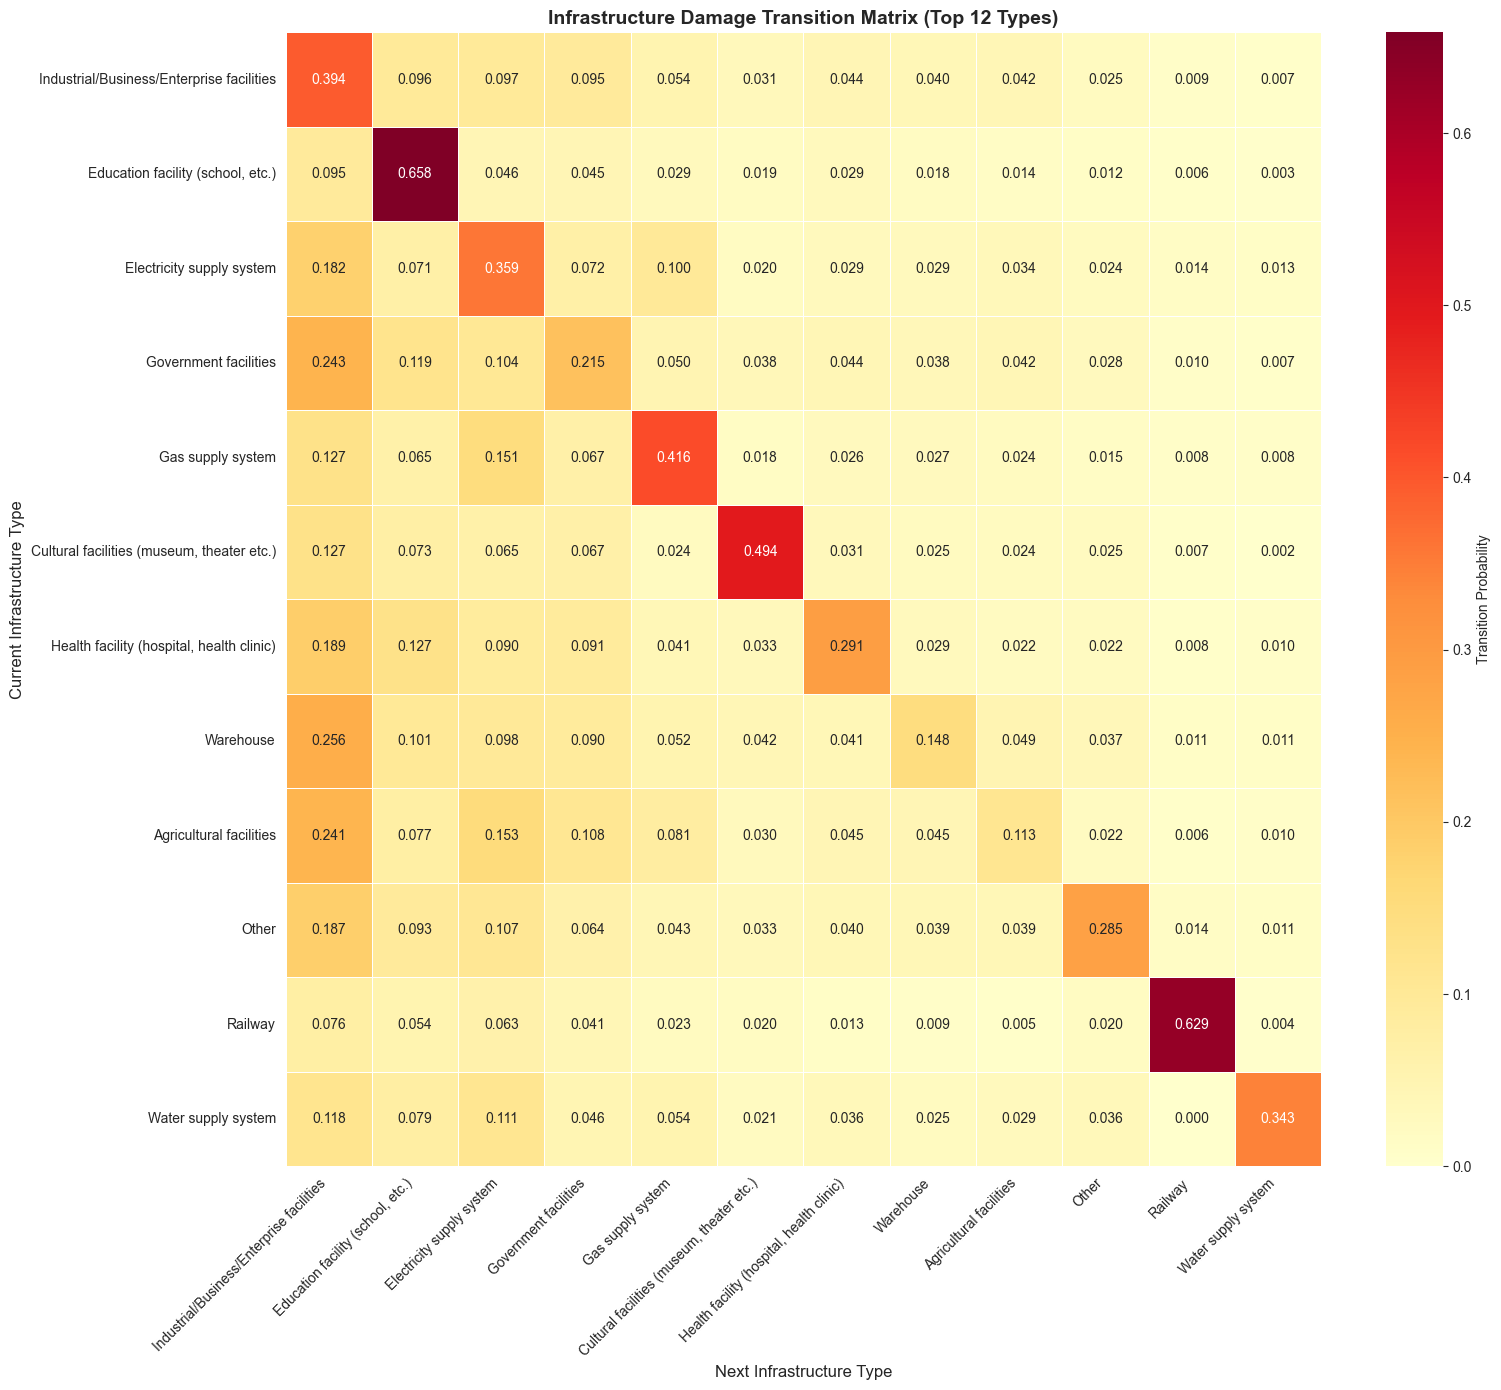

In [39]:
plot_transition_matrix(transition_matrix, transition_counts, top_n=12)

In [40]:
# Questions

questions = [
    ('Warehouse', 'Bridge'),
    ('Education facility (school, etc.)', 'Health facility (hospital, health clinic)'),
    ('Industrial/Business/Enterprise facilities', 'Electricity supply system'),
    ('Bridge', 'Road / Highway'),
    ('Electricity supply system', 'Gas supply system')
]

for from_state, to_state in questions:
    result = get_transition_probability(transition_matrix, transition_counts, from_state, to_state)
    if result:
        print(f'\nQ: Given {from_state} was damaged, what is the probability that the next damage is to {to_state}?')
        print(f'\f Answer: {result['percentage']} ({result['observed_transitions']} out of {result["total_from_state"]} total transitions from {from_state})')


Q: Given Warehouse was damaged, what is the probability that the next damage is to Bridge?
 Answer: 0.24% (2 out of 833 total transitions from Warehouse)

Q: Given Education facility (school, etc.) was damaged, what is the probability that the next damage is to Health facility (hospital, health clinic)?
 Answer: 2.91% (146 out of 5019 total transitions from Education facility (school, etc.))

Q: Given Industrial/Business/Enterprise facilities was damaged, what is the probability that the next damage is to Electricity supply system?
 Answer: 9.73% (492 out of 5055 total transitions from Industrial/Business/Enterprise facilities)

Q: Given Bridge was damaged, what is the probability that the next damage is to Road / Highway?
 Answer: 1.37% (2 out of 146 total transitions from Bridge)

Q: Given Electricity supply system was damaged, what is the probability that the next damage is to Gas supply system?
 Answer: 9.95% (300 out of 3015 total transitions from Electricity supply system)


In [41]:
# Most Likely Next Damage Types

key_types = ['Warehouse', 'Bridge', 'Education facility (school, etc.)', 
             'Industrial/Business/Enterprise facilities']

for type in key_types:
    if type in transition_matrix.index:
        print(f'Given {type} damage, most likely next:')
        result = get_most_likely_next(transition_matrix, transition_counts, type, top_n=5)
        display(result)

Given Warehouse damage, most likely next:


,Next Infrastructure Type,Probability,Percentage,Observed Count
0,Industrial/Business/Enterprise facilities,0.255702,25.57%,213
1,Warehouse,0.147659,14.77%,123
2,"Education facility (school, etc.)",0.100840,10.08%,84
3,Electricity supply system,0.098439,9.84%,82
4,Government facilities,0.090036,9.00%,75


Given Bridge damage, most likely next:


,Next Infrastructure Type,Probability,Percentage,Observed Count
0,Bridge,0.506849,50.68%,74
1,Industrial/Business/Enterprise facilities,0.082192,8.22%,12
2,"Education facility (school, etc.)",0.061644,6.16%,9
3,"Health facility (hospital, health clinic)",0.041096,4.11%,6
4,Water supply system,0.041096,4.11%,6


Given Education facility (school, etc.) damage, most likely next:


,Next Infrastructure Type,Probability,Percentage,Observed Count
0,"Education facility (school, etc.)",0.658498,65.85%,3305
1,Industrial/Business/Enterprise facilities,0.094840,9.48%,476
2,Electricity supply system,0.046025,4.60%,231
3,Government facilities,0.044830,4.48%,225
4,"Health facility (hospital, health clinic)",0.029089,2.91%,146


Given Industrial/Business/Enterprise facilities damage, most likely next:


,Next Infrastructure Type,Probability,Percentage,Observed Count
0,Industrial/Business/Enterprise facilities,0.393670,39.37%,1990
1,Electricity supply system,0.097329,9.73%,492
2,"Education facility (school, etc.)",0.096340,9.63%,487
3,Government facilities,0.094758,9.48%,479
4,Gas supply system,0.053610,5.36%,271


In [42]:
# Steady State Analysis
steady_state = calculate_steady_state(transition_matrix)
print("\nTop 10 infrastructure types in steady state:")
for state, prob in steady_state.head(10).items():
    print(f"{state:50s}: {prob*100:5.2f}%")



Top 10 infrastructure types in steady state:
Industrial/Business/Enterprise facilities         : 20.85%
Education facility (school, etc.)                 : 20.71%
Electricity supply system                         : 12.44%
Government facilities                             :  8.50%
Gas supply system                                 :  8.11%
Cultural facilities (museum, theater etc.)        :  4.99%
Health facility (hospital, health clinic)         :  4.82%
Warehouse                                         :  3.44%
Agricultural facilities                           :  3.32%
Other                                             :  2.99%


In [43]:
# Top Transitions
transition_list = []

for i in range(len(transition_counts)):
    for j in range(len(transition_counts)):
        count = transition_counts.iloc[i, j]
        if count > 0:
            transition_list.append({
                'From': transition_counts.index[i],
                'To': transition_counts.columns[j],
                'Count': int(count),
                'Probability': transition_matrix.iloc[i, j]
            })

top_transitions = pd.DataFrame(transition_list).sort_values('Count', ascending=False).head(10)

print("\nTop 10 transitions:")
display(top_transitions)


Top 10 transitions:


,From,To,Count,Probability
24,"Education facility (school, etc.)","Education facility (school, etc.)",3305,0.658498
0,Industrial/Business/Enterprise facilities,Industrial/Business/Enterprise facilities,1990,0.393670
48,Electricity supply system,Electricity supply system,1081,0.358541
96,Gas supply system,Gas supply system,818,0.415862
120,"Cultural facilities (museum, theater etc.)","Cultural facilities (museum, theater etc.)",598,0.494215
46,Electricity supply system,Industrial/Business/Enterprise facilities,548,0.181758
69,Government facilities,Industrial/Business/Enterprise facilities,500,0.242718
2,Industrial/Business/Enterprise facilities,Electricity supply system,492,0.097329
1,Industrial/Business/Enterprise facilities,"Education facility (school, etc.)",487,0.096340
3,Industrial/Business/Enterprise facilities,Government facilities,479,0.094758


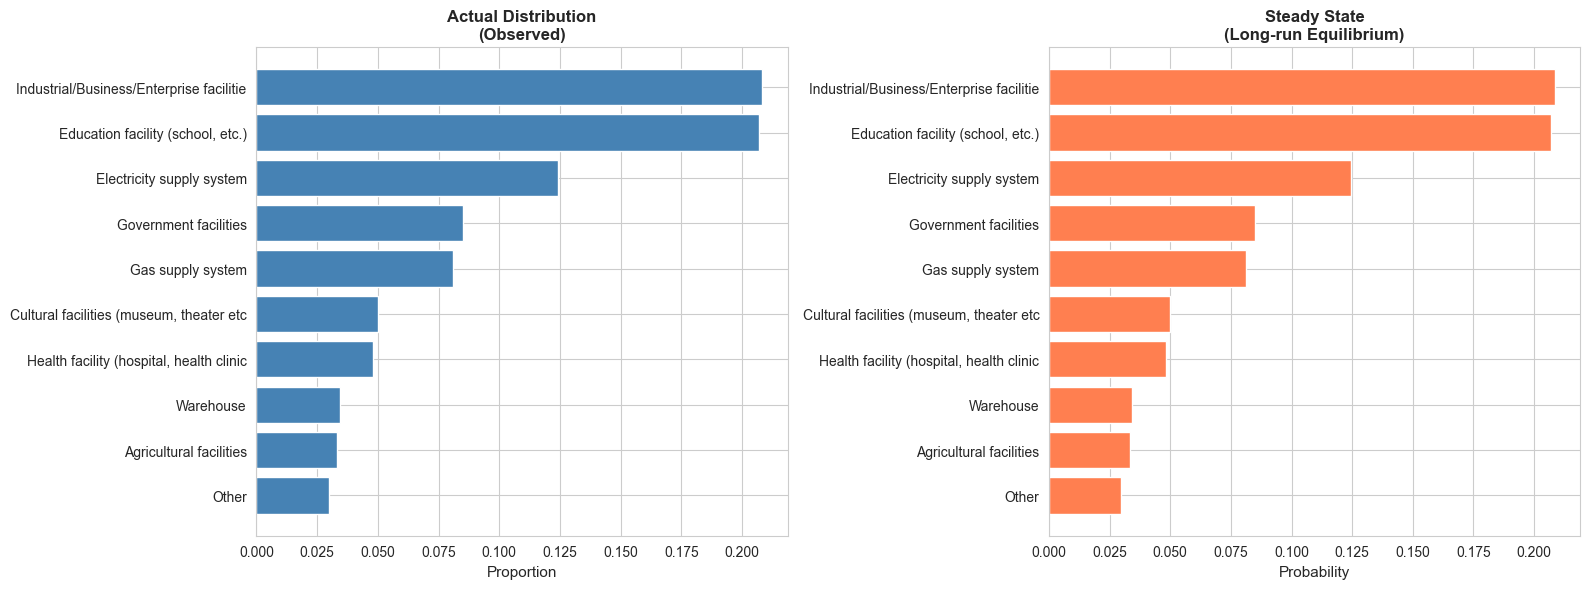

In [44]:
plot_steady_state_comparison(steady_state, ukraine, sequence_col='type_of_infrastructure')

In [30]:
steady_state.head(10)

Industrial/Business/Enterprise facilities     0.208505
Education facility (school, etc.)             0.207112
Electricity supply system                     0.124409
Government facilities                         0.084971
Gas supply system                             0.081133
Cultural facilities (museum, theater etc.)    0.049910
Health facility (hospital, health clinic)     0.048177
Warehouse                                     0.034361
Agricultural facilities                       0.033203
Other                                         0.029872
dtype: float64

### Use of Model / Inferential - Region

There are 27 first-level administrative divisions of Ukriane, known as oblast, similar to province/state. below is a breakdown:

- 24 standard oblasts (e.g., Luhanska, Lvivska, Kyivska, etc.)
- Autonomous Republic of Crimea (disputed territory)
- Kyiv (city with special status)
- Sevastopol (city with special status)

In [51]:
# Build Transition Matrix
transition_matrix, transition_counts, valid_states = build_transition_matrix(ukraine, 'oblast', min_count=10)

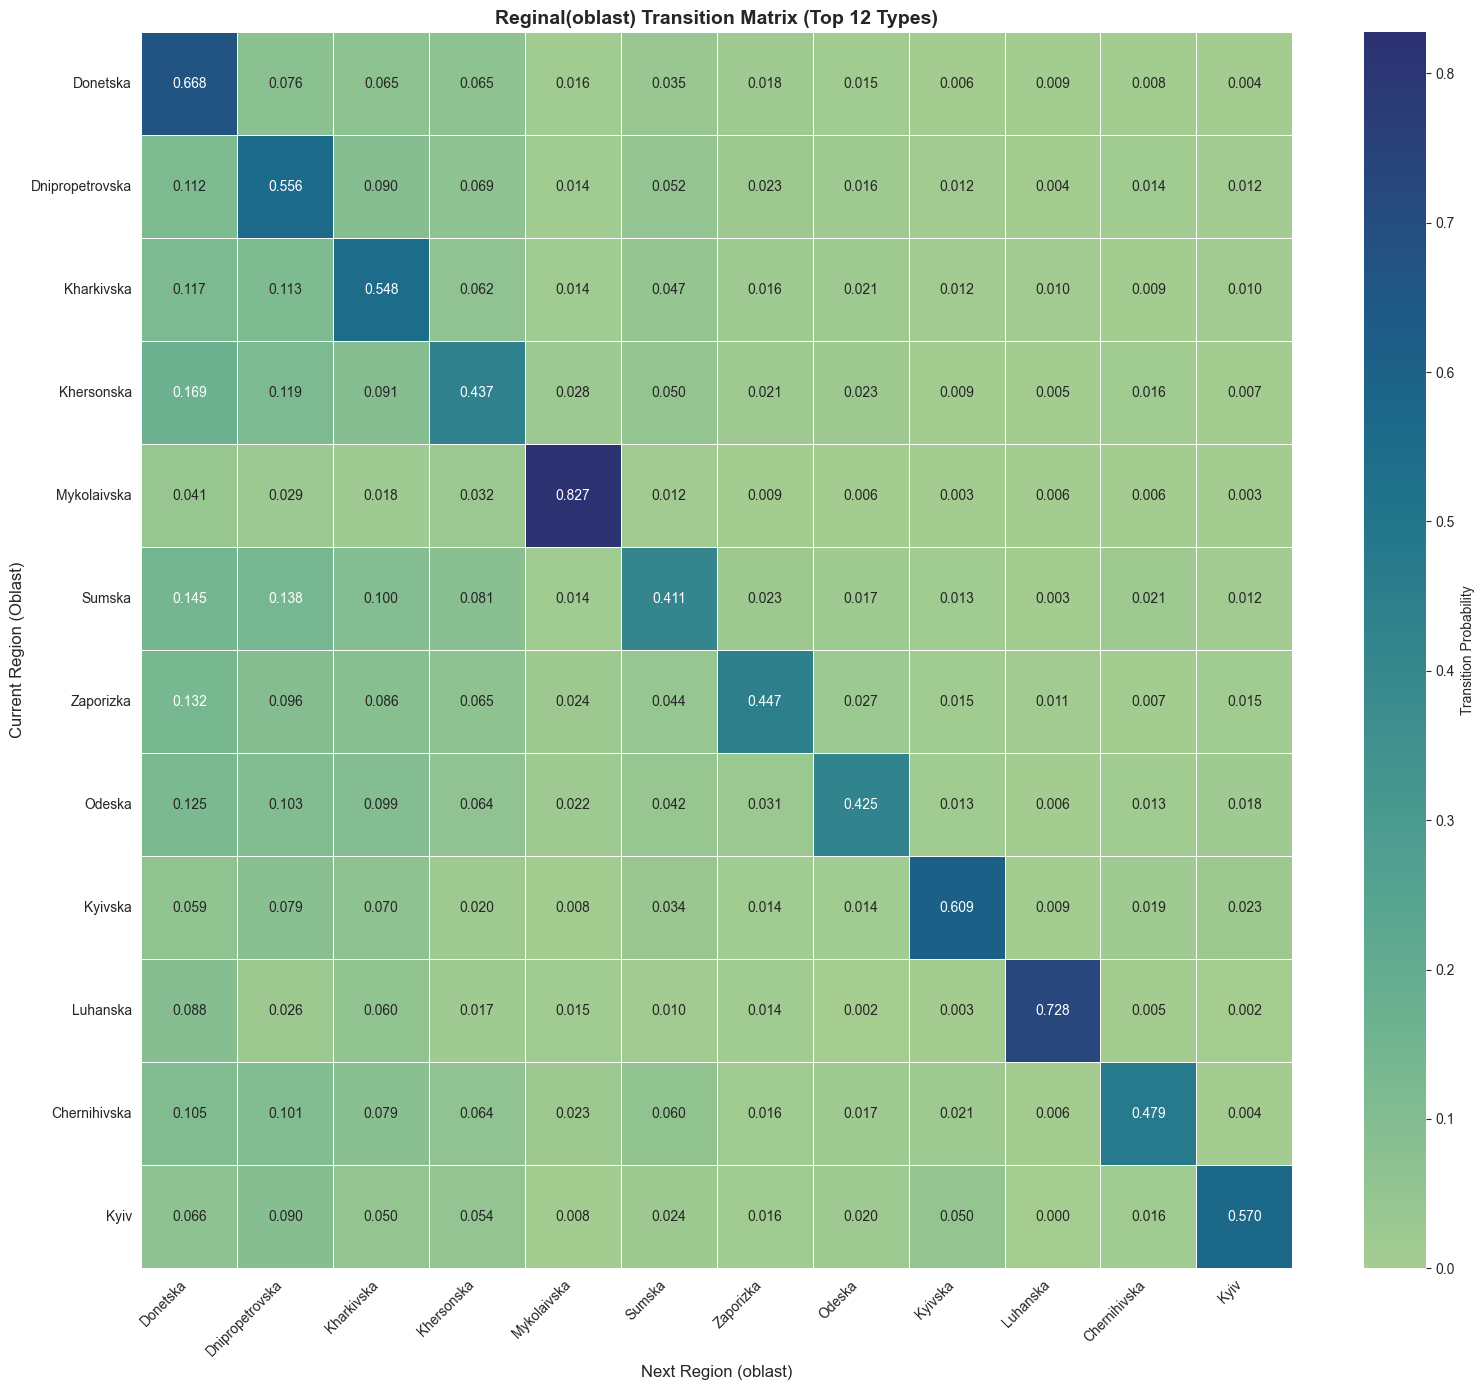

In [ ]:
plot_transition_matrix_region(transition_matrix, transition_counts, top_n=12)
# From the map, it appears subsequent attacks will more likely to happy in the same region

In [53]:
ukraine.oblast.value_counts()

oblast
Donetska                         6095
Dnipropetrovska                  4053
Kharkivska                       3393
Khersonska                       2305
Mykolaivska                      2110
Sumska                           1540
Zaporizka                         803
Odeska                            671
Kyivska                           645
Luhanska                          588
Chernihivska                      516
Kyiv                              498
Zhytomyrska                       204
Khmelnytska                       177
Poltavska                         148
Cherkaska                         133
Lvivska                           128
Kirovohradska                      67
Vinnytska                          53
Ternopilska                        37
Rivnenska                          22
Ivano-Frankivska                   19
Autonomous Republic of Crimea      16
Volynska                           16
Zakarpatska                        12
Chernivetska                        7
Sevas

In [ ]:
# Questions - see the probabilty the capital will be attacked when frontline regions are attacked and other neighbour frontline regions would be attached

questions = [
    ('Donetska', 'Kyiv'),
    ('Dnipropetrovska', 'Kyiv'),
    ('Dnipropetrovska', 'Kharkivska'),
    ('Zakarpatska', 'Dnipropetrovska'),
    ('Kharkivska', 'Sumska')
]

for from_state, to_state in questions:
    result = get_transition_probability(transition_matrix, transition_counts, from_state, to_state)
    if result:
        print(f'\nQ: Given {from_state} was attaked, what is the probability that {to_state} will also be attached?')
        print(f'\f Answer: {result['percentage']} ({result['observed_transitions']} out of {result["total_from_state"]} total transitions from {from_state})')
        


Q: Given Donetska was attaked, what is the probability that Kyiv will also be attached?
 Answer: 0.43% (26 out of 6092 total transitions from Donetska)

Q: Given Dnipropetrovska was attaked, what is the probability that Kyiv will also be attached?
 Answer: 1.16% (47 out of 4049 total transitions from Dnipropetrovska)

Q: Given Dnipropetrovska was attaked, what is the probability that Kharkivska will also be attached?
 Answer: 8.99% (364 out of 4049 total transitions from Dnipropetrovska)

Q: Given Zakarpatska was attaked, what is the probability that Dnipropetrovska will also be attached?
 Answer: 8.33% (1 out of 12 total transitions from Zakarpatska)

Q: Given Kharkivska was attaked, what is the probability that Sumska will also be attached?
 Answer: 4.72% (160 out of 3392 total transitions from Kharkivska)


In [64]:
ukraine.oblast.value_counts().index

Index(['Donetska', 'Dnipropetrovska', 'Kharkivska', 'Khersonska',
       'Mykolaivska', 'Sumska', 'Zaporizka', 'Odeska', 'Kyivska', 'Luhanska',
       'Chernihivska', 'Kyiv', 'Zhytomyrska', 'Khmelnytska', 'Poltavska',
       'Cherkaska', 'Lvivska', 'Kirovohradska', 'Vinnytska', 'Ternopilska',
       'Rivnenska', 'Ivano-Frankivska', 'Autonomous Republic of Crimea',
       'Volynska', 'Zakarpatska', 'Chernivetska', 'Sevastopol'],
      dtype='object', name='oblast')

In [ ]:
# Most Likely Next 3 oblast that might be attacked

key_types = ['Donetska', 'Dnipropetrovska', 'Kharkivska', 'Khersonska','Mykolaivska']

for type in key_types:
    if type in transition_matrix.index:
        print(f'Given {type} is attacked, most likely next:')
        result = get_most_likely_next(transition_matrix, transition_counts, type, top_n=3)
        display(result)

Given Donetska is attacked, most likely next:


,Next Infrastructure Type,Probability,Percentage,Observed Count
0,Donetska,0.667761,66.78%,4068
1,Dnipropetrovska,0.075509,7.55%,460
2,Kharkivska,0.065496,6.55%,399


Given Dnipropetrovska is attacked, most likely next:


,Next Infrastructure Type,Probability,Percentage,Observed Count
0,Dnipropetrovska,0.555693,55.57%,2250
1,Donetska,0.112373,11.24%,455
2,Kharkivska,0.089899,8.99%,364


Given Kharkivska is attacked, most likely next:


,Next Infrastructure Type,Probability,Percentage,Observed Count
0,Kharkivska,0.548349,54.83%,1860
1,Donetska,0.117335,11.73%,398
2,Dnipropetrovska,0.112913,11.29%,383


Given Khersonska is attacked, most likely next:


,Next Infrastructure Type,Probability,Percentage,Observed Count
0,Khersonska,0.437066,43.71%,1007
1,Donetska,0.168837,16.88%,389
2,Dnipropetrovska,0.119358,11.94%,275


Given Mykolaivska is attacked, most likely next:


,Next Infrastructure Type,Probability,Percentage,Observed Count
0,Mykolaivska,0.827488,82.75%,1746
1,Donetska,0.040758,4.08%,86
2,Khersonska,0.031754,3.18%,67


In [69]:
# Steady State Analysis
steady_state = calculate_steady_state(transition_matrix)
print("\nTop 10 Region in steady state:")
for state, prob in steady_state.head(10).items():
    print(f"{state:16s}: {prob*100:5.2f}%")


Top 10 Region in steady state:
Donetska        : 25.15%
Dnipropetrovska : 16.74%
Kharkivska      : 14.00%
Khersonska      :  9.50%
Mykolaivska     :  8.68%
Sumska          :  6.36%
Zaporizka       :  3.31%
Odeska          :  2.77%
Kyivska         :  2.66%
Luhanska        :  2.43%


In [72]:
# Top Transitions
transition_list = []

for i in range(len(transition_counts)):
    for j in range(len(transition_counts)):
        count = transition_counts.iloc[i, j]
        if count > 0:
            transition_list.append({
                'From': transition_counts.index[i],
                'To': transition_counts.columns[j],
                'Count': int(count),
                'Probability': transition_matrix.iloc[i, j]
            })

top_transitions = pd.DataFrame(transition_list).sort_values('Count', ascending=False).head(10).reset_index(drop=True)

print("\nTop 10 transitions:")
display(top_transitions)


Top 10 transitions:


,From,To,Count,Probability
0,Donetska,Donetska,4068,0.667761
1,Dnipropetrovska,Dnipropetrovska,2250,0.555693
2,Kharkivska,Kharkivska,1860,0.548349
3,Mykolaivska,Mykolaivska,1746,0.827488
4,Khersonska,Khersonska,1007,0.437066
5,Sumska,Sumska,632,0.410656
6,Donetska,Dnipropetrovska,460,0.075509
7,Dnipropetrovska,Donetska,455,0.112373
8,Luhanska,Luhanska,428,0.727891
9,Donetska,Kharkivska,399,0.065496


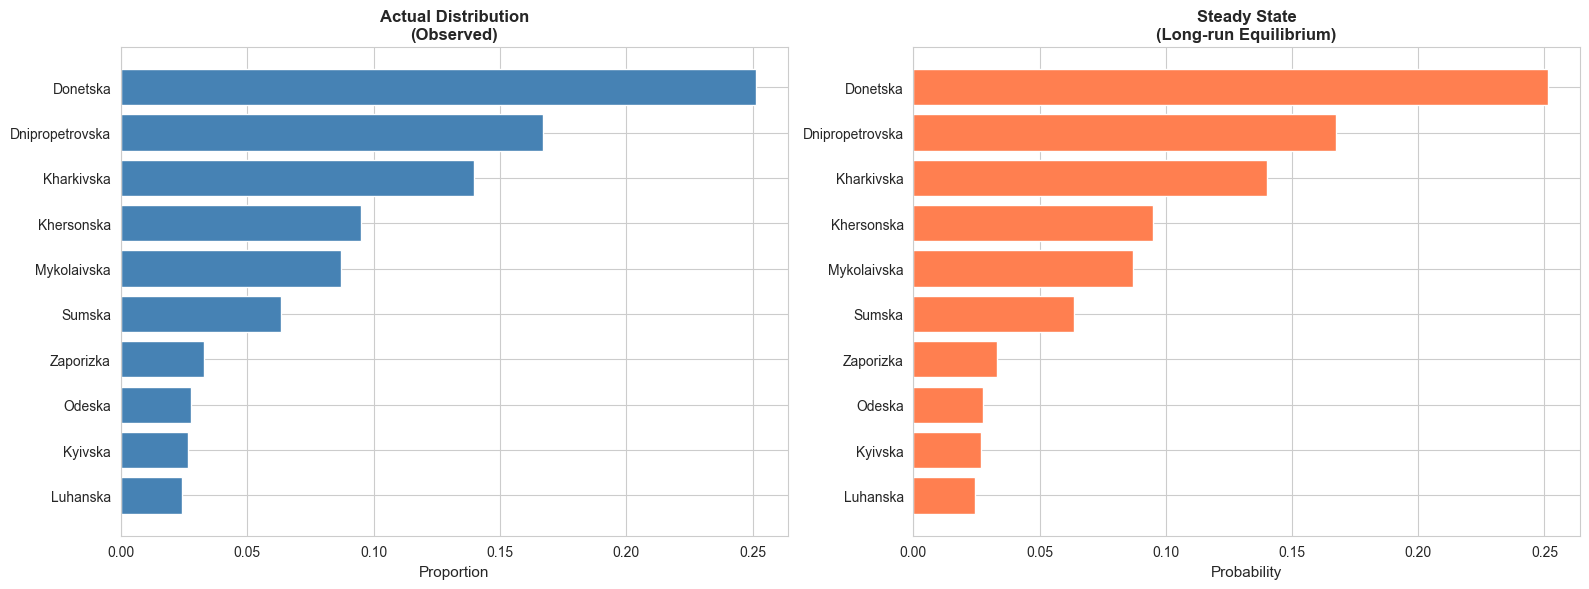

In [73]:
plot_steady_state_comparison(steady_state, ukraine, sequence_col='oblast')

In [74]:
steady_state.head(10)

Donetska           0.251491
Dnipropetrovska    0.167411
Kharkivska         0.140003
Khersonska         0.095039
Mykolaivska        0.086845
Sumska             0.063574
Zaporizka          0.033144
Odeska             0.027714
Kyivska            0.026614
Luhanska           0.024254
dtype: float64

## Critical Evaluation

**Critically evaluate your work in part 4. Do your sequences have the properties of the training data, and if not, why not? Are your estimates credible and reliable, or is there substantial uncertainty in your results? (15/100 pts)**

Prtially yes, but with caveats. The Markov chain captures the most frequent transitions and the steady-state distribution broadly mirrors the observed distribution.

However:

- Missing data bias: 26% of events lack dates and 36% lack rayon info, so sequences may omit significant regional patterns.

- Loss of temporal granularity: The model ignores seasonality and escalation phases visible in the monthly trend analysis (e.g., spikes in 2024–2025).

- Memoryless assumption: Real-world conflict dynamics are not truly first-order; damage often occurs in clusters (e.g., repeated strikes on energy systems during winter), which the model cannot capture.

## Conclusion

**Write a conclusion that explains the limitations of your analysis and potential for future work on this topic. (10/100 pts)**

Our Markov Chain Analysis assumes memoryless, time-homogenous transitions and does not account for geograhpic clustering or strategic complexity,

Limitations

- Model assumptions: Memoryless and time-homogeneous assumptions oversimplify real escalation dynamics.

- Missing Data: Missing event dates and rayon-level detail reduce temporal and spatial fidelity.

- The model ignores clustering by oblast, which is critical for operational early-warning.

- Strategic context omitted: Transition probabilities do not account for military objectives or seasonal energy targeting.

# Other

In addition, submit a GitHub repo containing your code and a description of how to obtain the original data from the source. Make sure the code is commented, where appropriate. Include a .gitignore file. We will look at your commit history briefly to determine whether everyone in the group contributed. (10/100 pts)

In class, we'll briefly do presentations and criticize each other's work, and participation in your group's presentation and constructively critiquing the other groups' presentations accounts for the remaining 15/100 pts.